# Students Do: Predicting Loan Default with Random Forests

In this activity, you are going to explore how random forest algorithm can be used to identify loans that are likely to default. You will use the `sba_loans_encoded.csv` file that you created before to train the model

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`

In [2]:
# Loading data
file_path = Path("../Resources/sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [3]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()



,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [17]:
# Define target vector
# y = df_loans["Default"].ravel()
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()


In [7]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [8]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model

Once data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [9]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)


In [10]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))



Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,330,14
Actual 1,36,145


Accuracy Score : 0.9047619047619048
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       344
           1       0.91      0.80      0.85       181

    accuracy                           0.90       525
   macro avg       0.91      0.88      0.89       525
weighted avg       0.91      0.90      0.90       525



## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [14]:
# Get the feature importance array
importances = rf_model.feature_importances_


In [15]:
# List the top 10 most important features
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.32525509355569393, 'Term'),
 (0.08731610602488035, 'Year'),
 (0.07749126212056351, 'Amount'),
 (0.04154318603507449, 'Zip'),
 (0.0359707771436633, 'NoEmp'),
 (0.030281829481746146, 'RealEstate'),
 (0.028696674498168147, 'Month'),
 (0.024032270489503894, 'CreateJob'),
 (0.020296840586558236, 'RevLineCr'),
 (0.017578173845109207, 'Bank_BANK OF AMERICA NATL ASSOC'),
 (0.01630039986086774, 'UrbanRural'),
 (0.014857140533831126, 'Bank_CAPITAL ONE NATL ASSOC'),
 (0.008377131697554734, 'Bank_BBCN BANK'),
 (0.006995819372615248, 'Bank_WELLS FARGO BANK NATL ASSOC'),
 (0.005342369989780977, 'City_SAN LUIS OBISPO'),
 (0.005274987446013411, 'Bank_SUPERIOR FINANCIAL GROUP, LLC'),
 (0.004886449711829266, 'Bank_CALIFORNIA BANK & TRUST'),
 (0.0045112624632712055, 'Bank_U.S. BANK NATIONAL ASSOCIATION'),
 (0.004473981096047316, 'City_LOS ANGELES'),
 (0.004242713341913602, 'City_MADERA'),
 (0.004102049464835388, 'City_CHULA VISTA'),
 (0.003979463687738055, 'Bank_WILSHIRE BANK'),
 (0.00368630270299005


Bad key savefig.frameon in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

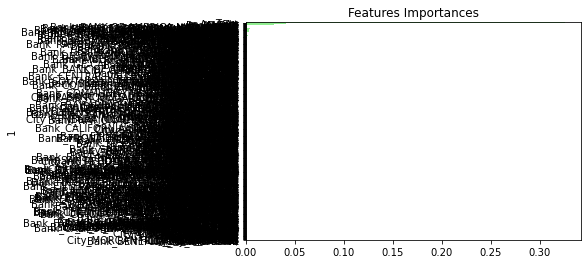

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions.

* **Question 1:** Would you trust in this model to deploy a loan default solution in a bank?

 * **Your answer here**


* **Question 2:** What are your insights about the top 10 most importance features?

 * **Your answer here**